SVM with LINEAR kernel
Accuracy score :  0.91
Classification report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

SVM with POLY kernel
Accuracy score :  0.91
Classification report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

SVM with RBF kernel
Accuracy score :  0.91
Classification report : 
              precision    rec

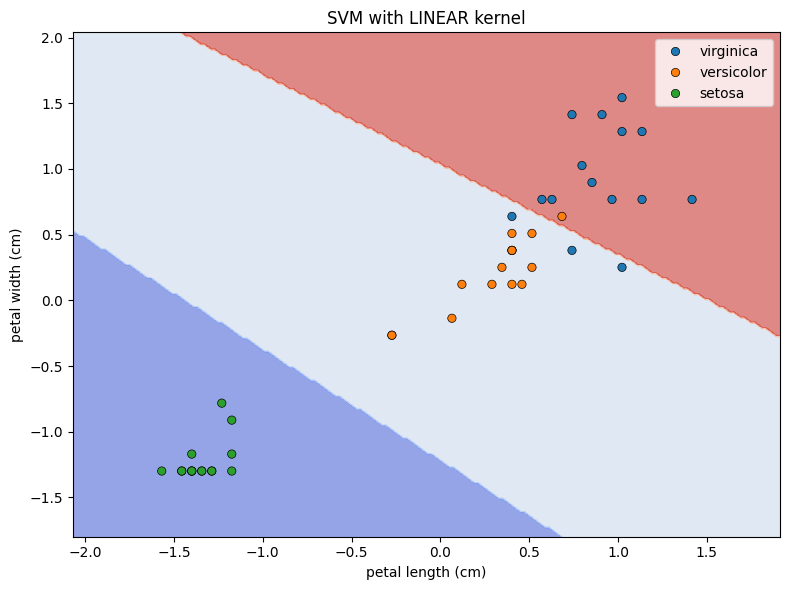

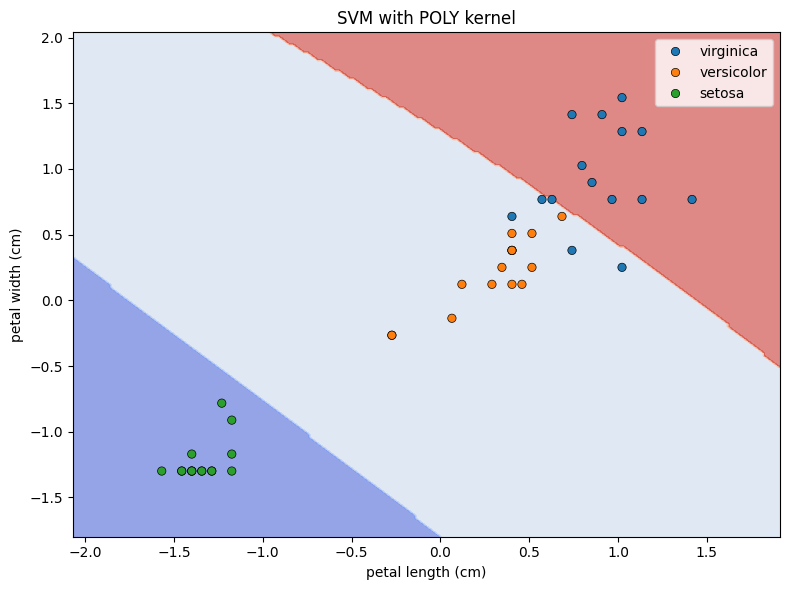

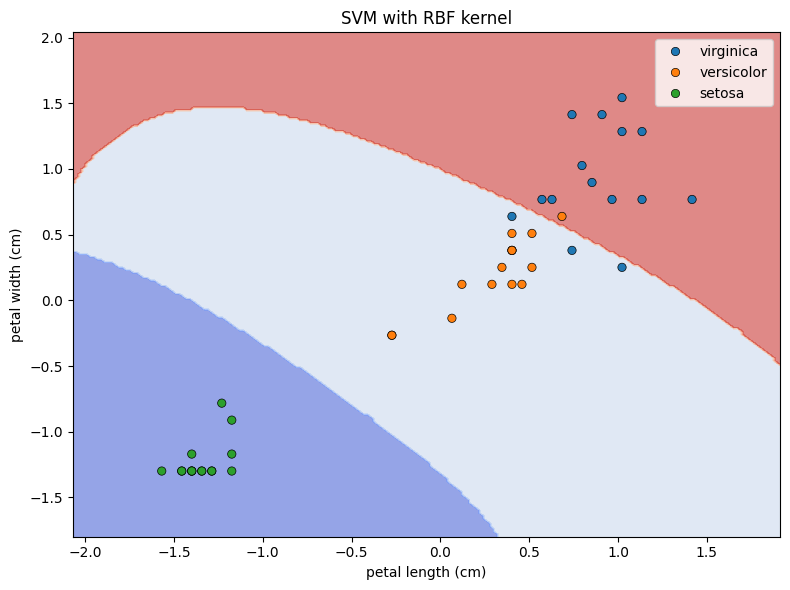

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

X_2d = X[:,[2,3]]
X_train,X_test,y_train, y_test = train_test_split(X_2d, y, test_size=0.3, stratify=y,random_state= 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# it should be transform in x_test_scaled
kernels = ['linear', 'poly', 'rbf']
models = {}

for kernel in kernels:
    if kernel=='poly':
        clf = SVC(kernel=kernel, degree=3, gamma='auto')
    else:
        clf = SVC(kernel=kernel, gamma='auto')

    clf.fit(X_train_scaled, y_train)
    models[kernel] = clf
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"SVM with {kernel.upper()} kernel")
    print(f"Accuracy score : {acc : .2f}")
    print(f"Classification report : \n{classification_report(y_test,y_pred, target_names=target_names)}")

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx,yy = np.meshgrid(np.arange(x_min,x_max, h),
                         np.arange(y_min,y_max,h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # don't forget the brackets in the code and arguments
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy,Z, cmap = plt.cm.coolwarm, alpha = 0.6 )
    sns.scatterplot(x = X[:,0], y= X[:,1], hue = iris.target_names[y] , edgecolor='k')
    plt.xlabel(feature_names[2])
    plt.ylabel(feature_names[3])
    plt.title(title)
    plt.tight_layout()
    plt.show()

for kernel in kernels:
    plot_decision_boundary(models[kernel], X_test_scaled, y_test, f"SVM with {kernel.upper()} kernel")